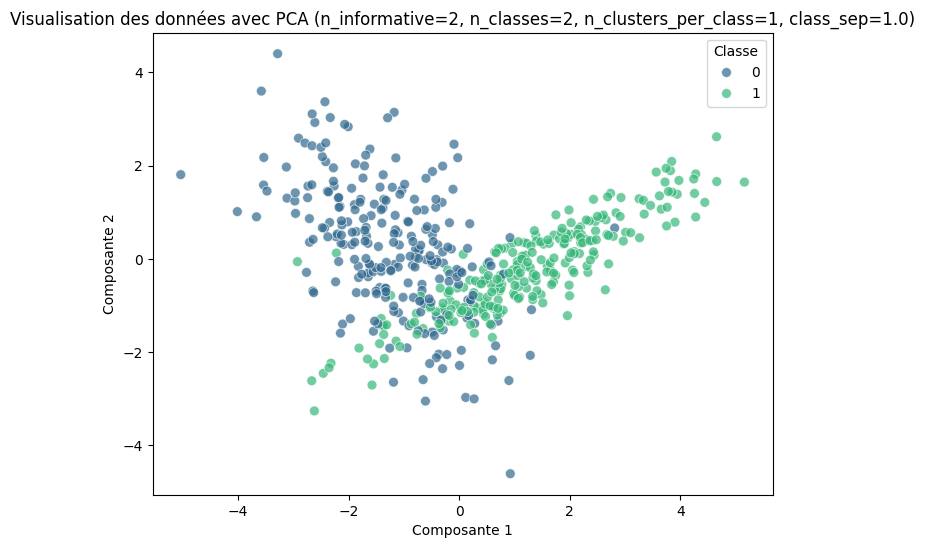

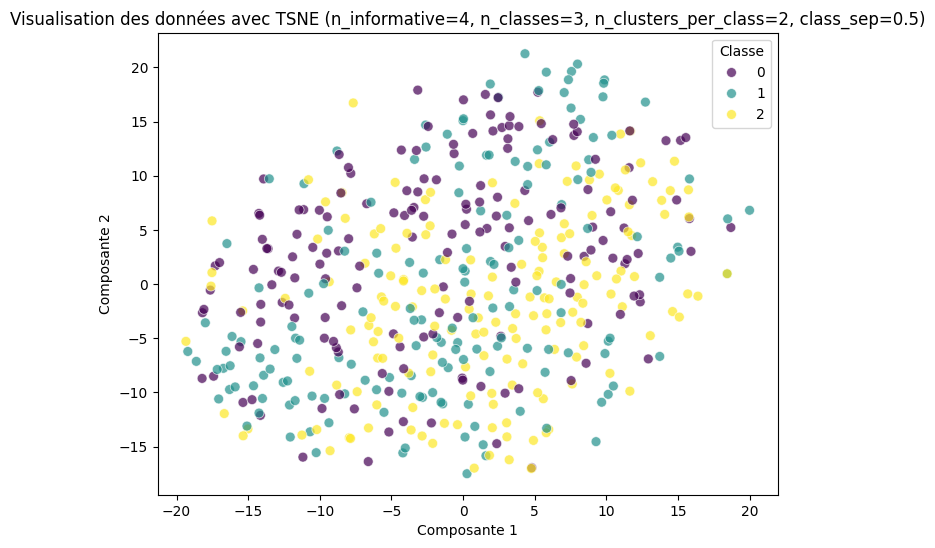

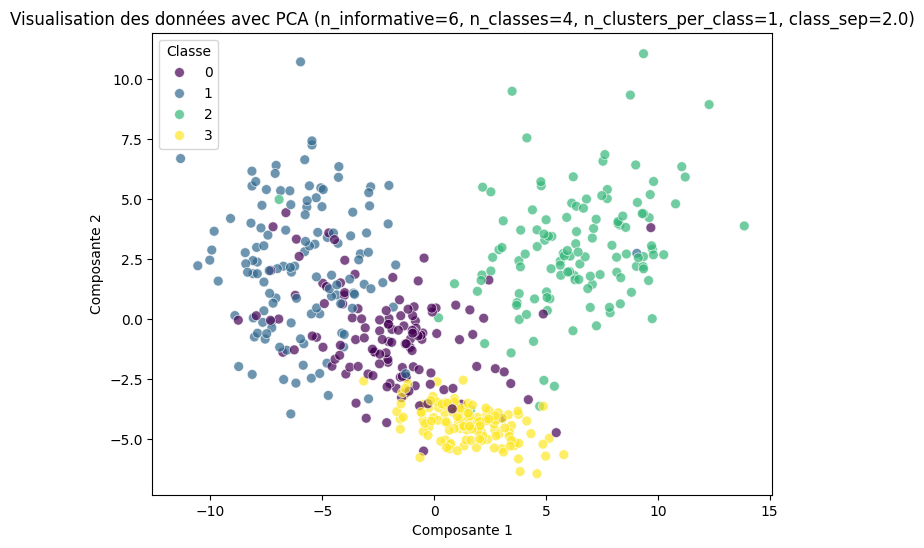

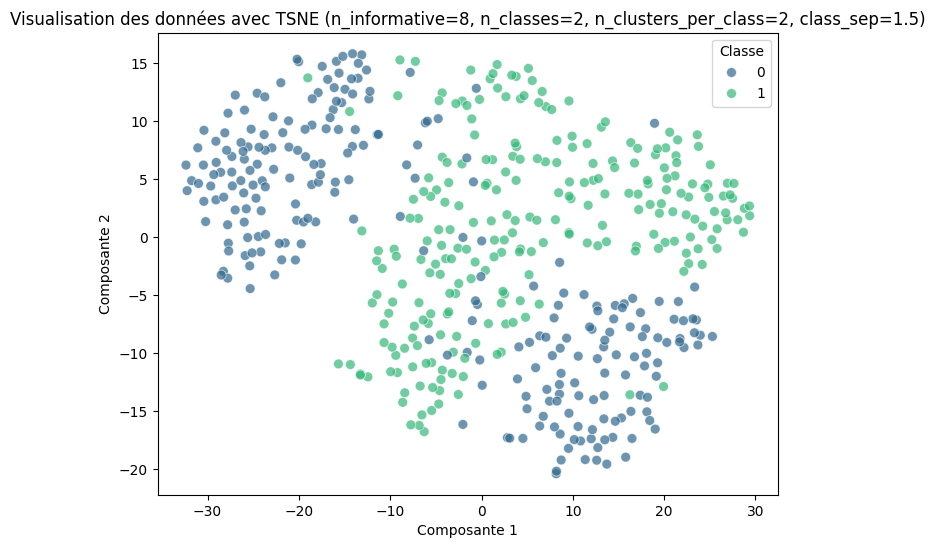

In [2]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour générer et visualiser les données
def generate_and_visualize(n_samples=500, n_features=20, n_informative=2, n_redundant=2,
                           n_classes=2, n_clusters_per_class=1, class_sep=1.0, method="pca"):
    # Générer les données
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters_per_class,
        class_sep=class_sep,
        random_state=42
    )

    # Réduction de dimension
    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Méthode de réduction non reconnue : choisissez 'pca' ou 'tsne'.")

    X_reduced = reducer.fit_transform(X)

    # Visualisation
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette="viridis", s=50, alpha=0.7)
    plt.title(f"Visualisation des données avec {method.upper()} (n_informative={n_informative}, "
              f"n_classes={n_classes}, n_clusters_per_class={n_clusters_per_class}, class_sep={class_sep})")
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.legend(title="Classe")
    plt.show()

# Test des paramètres avec différentes configurations
generate_and_visualize(n_informative=2, n_classes=2, n_clusters_per_class=1, class_sep=1.0, method="pca")
generate_and_visualize(n_informative=4, n_classes=3, n_clusters_per_class=2, class_sep=0.5, method="tsne")
generate_and_visualize(n_informative=6, n_classes=4, n_clusters_per_class=1, class_sep=2.0, method="pca")
generate_and_visualize(n_informative=8, n_classes=2, n_clusters_per_class=2, class_sep=1.5, method="tsne")